In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("dataset.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
#null value check
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [13]:
print(df.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [14]:
print(df['marital-status'].value_counts())

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [15]:
print(df['native-country'].value_counts())

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [16]:
print(df['relationship'].value_counts())

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64


In [17]:
print(df['race'].value_counts())

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64


In [18]:
print(df['gender'].value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [19]:
print(df['education'].value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [20]:
print(df['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [21]:
print(df['age'].value_counts())

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


In [22]:
df['occupation']=df['occupation'].replace("?", "Others")
df['workclass']=df['workclass'].replace("?", "Others")
df['native-country']=df['native-country'].replace("?", "Others")

Removing Outliers

In [23]:
df = df[df['workclass']!='Without-pay']

In [24]:
df = df[df['workclass']!='Never-worked']

In [25]:
df = df[df['occupation']!='Armed-Forces']

In [26]:
df.shape

(48796, 15)

In [27]:
df.drop(columns=['education'], inplace=True)
df.drop(columns=['fnlwgt'], inplace=True)

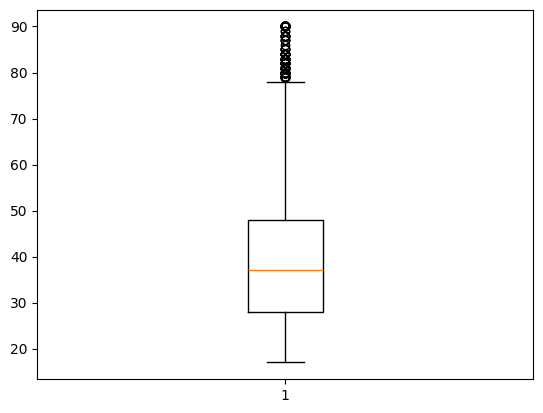

In [28]:
# circle ones are not useful they are outliers
import matplotlib.pyplot as plt
plt.boxplot(df['age'])
plt.show()

In [29]:
# Removing age outliers
df=df[(df['age']<=75) & (df['age']>=17)]

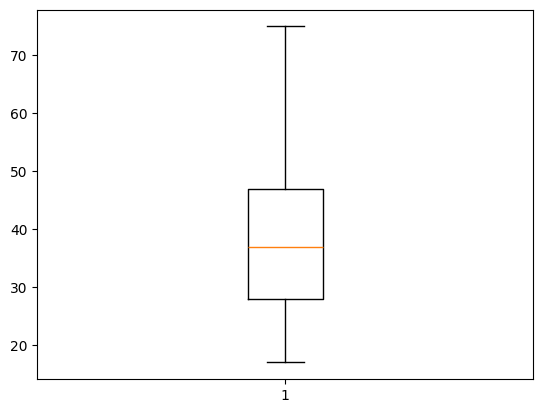

In [30]:
plt.boxplot(df['age'])
plt.show()

In [31]:
df=df[(df['educational-num']<=16)&(df['educational-num']>=5)]

Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder 
encoder=LabelEncoder()                     
df['workclass']=encoder.fit_transform(df['workclass']) 
df['marital-status']=encoder.fit_transform(df['marital-status'])  
df['occupation']=encoder.fit_transform(df['occupation'])
df['relationship']=encoder.fit_transform(df['relationship'])    
df['race']=encoder.fit_transform(df['race'])  
df['gender']=encoder.fit_transform(df['gender'])    
df['native-country']=encoder.fit_transform(df['native-country'])

In [33]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

Splitting The Dataset

In [34]:
# Splitting the Dataset
x = df.drop(columns=['income'])
y = df['income']

Fitting the Model

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.8162
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      7000
           1       0.71      0.45      0.55      2341

    accuracy                           0.82      9341
   macro avg       0.77      0.69      0.72      9341
weighted avg       0.80      0.82      0.80      9341

RandomForest Accuracy: 0.8453
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7000
           1       0.72      0.63      0.67      2341

    accuracy                           0.85      9341
   macro avg       0.80      0.78      0.79      9341
weighted avg       0.84      0.85      0.84      9341

KNN Accuracy: 0.8239
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7000
           1       0.67      0.60      0.63      2341

    accuracy                           0.82      9341
   macro avg       0.77      0.75      0.

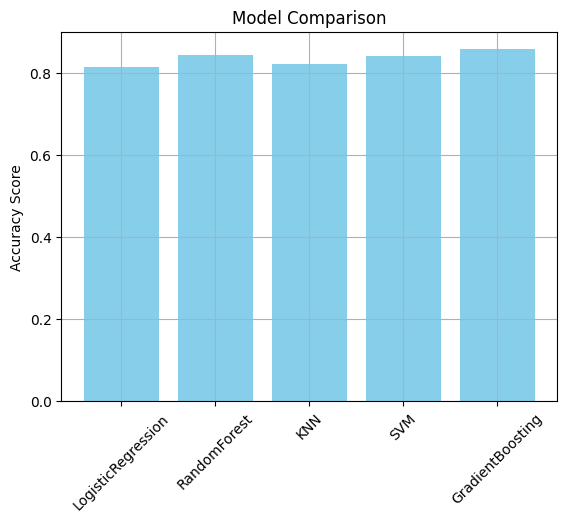

In [36]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")


joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


c:\Users\ashwi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.8101
RandomForest: 0.8476
KNN: 0.8408
SVM: 0.7953
GradientBoosting: 0.8585

✅ Best model: GradientBoosting with accuracy 0.8585
✅ Saved best model as best_model.pkl


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💲", layout="centered")

st.title("Employee Salary Classification App💲")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Employee Details")

# ✨ Replace these fields with your dataset's actual input columns
age = st.sidebar.slider("Age", 18, 65, 30)
gender = st.sidebar.selectbox("Gender", [
    "Male", "Female"
])

race = st.sidebar.selectbox("Race", [
    "White", "Black", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"
])

native_country = st.sidebar.selectbox("Native Country", [
    "United-States", "Mexico", "Philippines", "Germany", "Canada",
    "India", "Puerto-Rico", "El-Salvador", "Cuba", "England",
    "Jamaica", "South", "China", "Italy", "Dominican-Republic",
    "Vietnam", "Guatemala", "Japan", "Poland", "Columbia",
    "Haiti", "Iran", "Taiwan", "Portugal", "Nicaragua",
    "Peru", "France", "Ecuador", "Ireland", "Cambodia",
    "Laos", "Thailand", "Scotland", "Yugoslavia", "Hungary",
    "Trinadad&Tobago", "Greece", "Hong", "Holand-Netherlands",
    "Others"
])

education_map = {
    "9th": 5,
    "10th": 6,
    "11th": 7,
    "12th": 8,
    "HS-grad": 9,
    "Some-college": 10,
    "Assoc-voc": 11,
    "Assoc-acdm": 12,
    "Bachelors": 13,
    "Masters": 14,
    "Doctorate": 15
}

selected_education = st.sidebar.selectbox("Select your education level", list(education_map.keys()))
educational_num = education_map[selected_education]

marital_status = st.sidebar.selectbox("Marital Status", [
    "Married-civ-spouse", "Divorced", "Never-married", "Separated",
    "Widowed", "Married-spouse-absent", "Married-AF-spouse"
])

relationship = st.sidebar.selectbox("Relationship", [
    "Husband", "Wife", "Not-in-family", "Own-child",
    "Unmarried", "Other-relative"
])

occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv"
])
workclass = st.sidebar.selectbox("WorkClass", [
    "Private", "Self-emp-not-inc", "Local-gov", "State-gov", "Self-emp-inc", "Federal-gov", "Others"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
capital_gain = st.sidebar.slider("Capital Gain", 0, 99999, 1000)
capital_loss = st.sidebar.slider("Capital Loss", 0, 4300, 500)

# Build input DataFrame (⚠️ must match preprocessing of your training data)
input_df = pd.DataFrame({
    'age': [age],
    'workclass': [workclass],
    'educational-num': [educational_num],
    'marital-status': [marital_status],
    'occupation': [occupation],
    'relationship': [relationship],
    'race': [race],
    'gender':[gender],
    'capital-gain': [capital_gain],
    'capital-loss': [capital_loss],
    'hours-per-week': [hours_per_week],
    'native-country': [native_country]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Encoding
from sklearn.preprocessing import LabelEncoder

# Recreate encoder and apply it (same categories as in training)
encoder = LabelEncoder()

input_df['workclass'] = encoder.fit_transform(input_df['workclass'])
input_df['marital-status'] = encoder.fit_transform(input_df['marital-status'])
input_df['occupation'] = encoder.fit_transform(input_df['occupation'])
input_df['relationship'] = encoder.fit_transform(input_df['relationship'])
input_df['race'] = encoder.fit_transform(input_df['race'])
input_df['gender'] = encoder.fit_transform(input_df['gender'])
input_df['native-country'] = encoder.fit_transform(input_df['native-country'])


# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    if prediction == 1:
        st.success("Predicted Income: >50K 🤑")
        st.balloons()
    else:
        st.warning("Predicted Income: <=50K 💼")




Overwriting app.py


In [5]:
!streamlit run app.py

^C
